### Step 0 - import libraries

In [1]:
%matplotlib inline

# data wrangling & visualizations
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns

# models
import xgboost             as xgb

from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import Lasso
from sklearn.ensemble        import GradientBoostingRegressor
from lightgbm                import LGBMRegressor
from catboost                import CatBoostRegressor
from sklearn.linear_model    import SGDRegressor
from sklearn.kernel_ridge    import KernelRidge
from sklearn.linear_model    import ElasticNet
from sklearn.base            import BaseEstimator

# preprocessing & feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import FunctionTransformer
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import OneHotEncoder
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import KBinsDiscretizer

# validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import confusion_matrix, classification_report, accuracy_score

# warning & errors
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from friendly.jupyter import *

friendly_traceback 0.7.4; friendly 0.7.2.
Type 'Friendly' for basic help.


### Step 1 - read data

  - List the data you need and how much you need.

  - Find and document where you can get the data.

  - Check how much space it will take.

  - Check legal obligations, and get authorizations if necessary.

  - Get access authorizations.

  - Create a workspace (with enough storage space).

  - Get the data.

  - Convert the data to a format you can easily manipulate (without changing the data itself).

  - Ensure sensitive information is deleted or protected (e.g. anonymized).

  - Check the size and type of data (time series, sample, geographical, etc.).

  - Sample a test set, put it aside, and never look at it (no data snooping!).

In [2]:
#%time %memit
PATH = '/home/florianriemann/data_science_portfolio/boot_camp/data/bikesharing/'

df_bike, df_bike.name = pd.read_csv(PATH + 'train.csv'), 'df_bike'
df_bike = df_bike.loc[:, ~df_bike.columns.isin(['casual','registered'])]
df_bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40


### Step 2 - train-test-split

<hr style="border:2px solid black">

*Don't get biased by any stretch of the imagination. Do the train-test-split as early as possible!*

<hr style="border:2px solid black">

In [3]:
#%time %memit
X = df_bike.drop('count', axis=1)
y = df_bike['count']

In [4]:
#%time %memit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

### Step 3 - exploratory data analysis

#### Step 3.0 - workflow

  - Create a copy of the data exploration (sampling it down to a manageble size if necessary).

  - Create a notebook to keep a record of your data exploration.

  - Study each attribute and its characteristics:

    - Name
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values
    - Noisiness and type of noise (stoxastoc, outliers, rounding errors, etc.)
    - Possibly useful for the task?
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)
  - For supervised learning tasks, identify target attribute(s).

  - Visualize the data.

  - Study the correlation between attributes.

  - Study how you would solve the problem manually.

  - Identify the promising transformations you may want to apply.

  - Identify extra data that would be useful.

  - Document what you have learned.

#### Step 3.1 - general overview

*You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.* (https://www.kaggle.com/competitions/bike-sharing-demand/data)

##### **Categorical:**

- `Dichotomous`

>- <u>season</u> - ( 1 = spring | 2 = summer | 3 = fall | 4 = winter )
>- <u>holiday</u> - ( whether the day is considered a holiday )
>- <u>workingday</u> - ( whether the day is neither a weekend nor holiday )
>- <u>weather</u> 
>>-       1 = Clear, Few clouds, Partly cloudy, Partly cloudy
>>-       2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
>>-       3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
>>-       4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

##### **Numeric:**

- `Discrete`

>- <u>casual</u> - number of non-registered user rentals initiated	
>- <u>registered</u> - number of registered user rentals initiated
>- <u>count</u> - ( number of total rentals ) 

- `Continous`

>- <u>atemp</u> - "feels like" temperature in Celsius
>- <u>temp</u> - temperature in Celsius
>- <u>humidity</u> - relative humidity
>- <u>windspeed</u> - wind speed

##### **Datetime:**

>- <u>datetime</u> - hourly date + timestamp

In [5]:
#%time %memit
# for the EDA I will only use the training data, that includes the input vector as well as the labels
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
7360,2012-05-06 01:00:00,2,0,0,2,22.14,25.760,83,15.0013,121
10442,2012-12-01 12:00:00,4,0,0,2,13.12,16.665,81,6.0032,446
2475,2011-06-11 01:00:00,2,0,0,1,28.70,33.335,79,6.0032,77
6489,2012-03-07 15:00:00,1,0,1,1,22.14,25.760,37,30.0026,209
4322,2011-10-12 03:00:00,4,0,1,3,22.14,25.760,94,19.9995,2


In [6]:
df_train.shape

(8708, 10)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 7360 to 5787
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   count       8708 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 748.3+ KB


In [8]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

#### Step 3.2 - descriptive statistics

In [9]:
# translate the classes (numbers) into strings
df_train.replace({'season'  : { 1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' }}, inplace = True)
df_train.replace({'weather' : { 1 : 'nice'  , 2 : 'ok'    , 3 : 'bad' , 4 : 'worst'  }}, inplace = True)

# set datetime as an index
df_train['datetime'] = pd.to_datetime(df_train['datetime'], utc = True)
df_train.set_index('datetime', inplace = True)

# extract datetime information from the index
df_train["year"]       = df_train.index.year
df_train["month"]      = df_train.index.month
df_train["month_name"] = df_train.index.month_name()
df_train["day_name"]   = df_train.index.day_name()
df_train["day"]        = df_train.index.day
df_train["hour"]       = df_train.index.hour
df_train['weekofyear'] = df_train.index.isocalendar().week.astype(int)

In [10]:
# get a glance through the descriptive statistics
df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekofyear
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028939,0.681902,20.236334,23.656412,61.865181,12.769146,191.045935,2011.499081,6.520441,9.969109,11.524001,25.928227
std,0.167644,0.465765,7.771733,8.461706,19.293820,8.108651,180.570157,0.500028,3.444608,5.474947,6.934069,15.014163
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,47.000000,7.001500,41.000000,2011.000000,4.000000,5.000000,6.000000,14.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,144.500000,2011.000000,7.000000,10.000000,12.000000,26.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000,40.000000
max,1.000000,1.000000,39.360000,45.455000,100.000000,56.996900,970.000000,2012.000000,12.000000,19.000000,23.000000,52.000000


In [11]:
df_train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
month_name    0
day_name      0
day           0
hour          0
weekofyear    0
dtype: int64

[
│   Text(0.5, 0, 'Working Day'),
│   Text(0, 0.5, 'Count'),
│   Text(0.5, 1.0, 'Box Plot On Count Across Working Day')
]

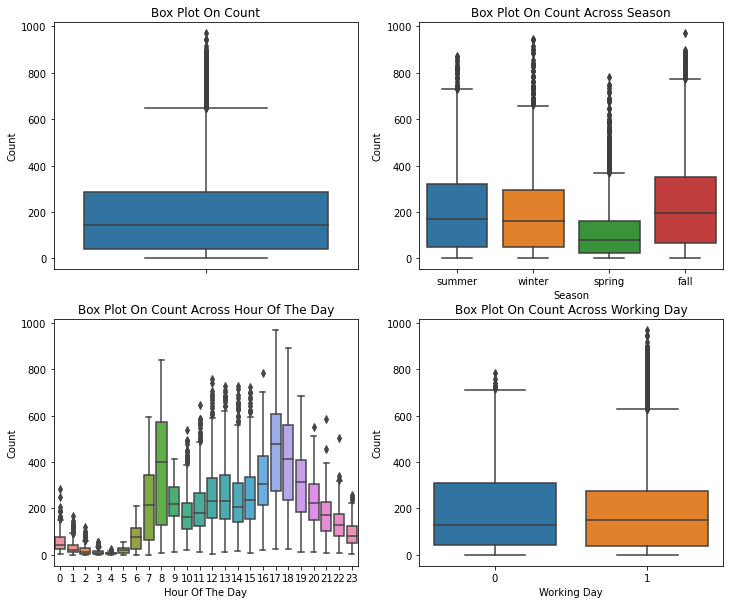

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)

sns.boxplot(data = df_train, y = "count"                   , orient = "v", ax = axes[0][0])
sns.boxplot(data = df_train, y = "count", x = "season"     , orient = "v", ax = axes[0][1])
sns.boxplot(data = df_train, y = "count", x = "hour"       , orient = "v", ax = axes[1][0])
sns.boxplot(data = df_train, y = "count", x = "workingday" , orient = "v", ax = axes[1][1])

axes[0][0].set(                             ylabel = 'Count', title = "Box Plot On Count")
axes[0][1].set(xlabel = 'Season'          , ylabel = 'Count', title = "Box Plot On Count Across Season")
axes[1][0].set(xlabel = 'Hour Of The Day' , ylabel = 'Count', title = "Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel = 'Working Day'     , ylabel = 'Count', title = "Box Plot On Count Across Working Day")

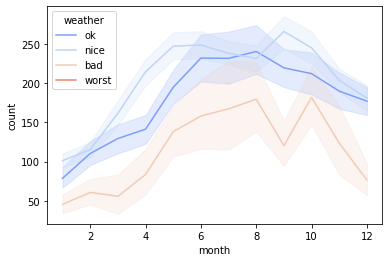

In [13]:
sns.lineplot(x = 'month', y = 'count', data = df_train, estimator = np.average, hue = 'weather', palette = 'coolwarm')

`DeprecationWarning`: distutils Version classes are deprecated. Use packaging.version instead.
`DeprecationWarning`: distutils Version classes are deprecated. Use packaging.version instead.


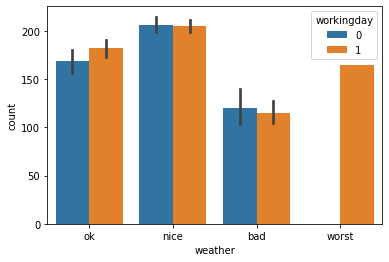

In [14]:
sns.barplot(data = df_train, 
            y    = "count", 
            hue  = "workingday", 
            x    = "weather")

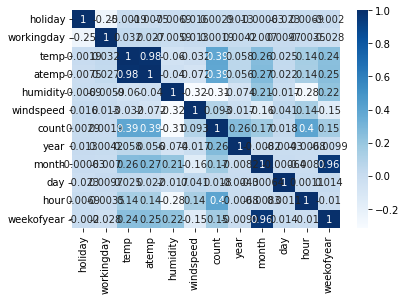

In [15]:
sns.heatmap(df_train.corr(),cbar=True,annot=True,cmap="Blues");

#### Step 3.3 - observe some features in more detail

##### Step 3.2.1 - Season

##### Step 3.2.2 - Holiday

##### Step 3.2.3 - Workingday

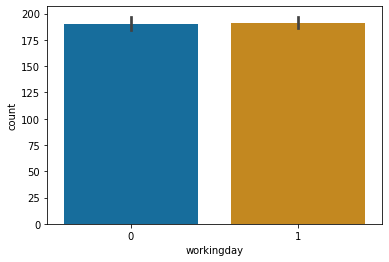

In [16]:
sns.barplot(x = 'workingday', y = 'count', data = df_train, estimator = np.average, palette='colorblind')

##### Step 3.2.4 - Weather

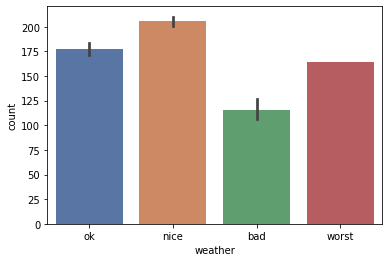

In [17]:
sns.barplot(x = 'weather', y = 'count', data = df_train, estimator = np.average, palette='deep')
# how many worst days are there? the count makes no real sense!

##### Step 3.2.5 - Temp

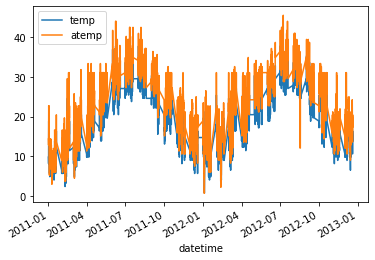

In [18]:
df_train[['temp','atemp']].plot.line();

##### Step 3.2.6 - Atemp

<seaborn.axisgrid.JointGrid object at 0x7f5ec05a4130>

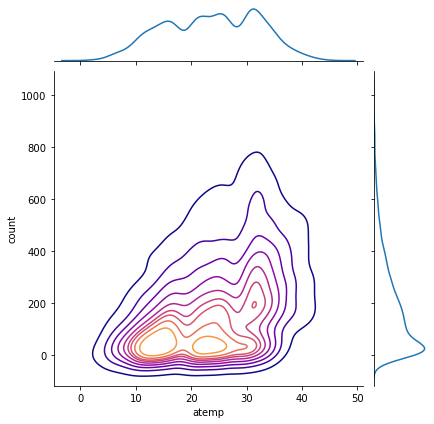

In [19]:
sns.jointplot(x = 'atemp', y = 'count', data = df_train, kind = 'kde', cmap = 'plasma')

##### Step 3.2.7 - Humidity

##### Step 3.2.8 - Windspeed

##### Step 3.2.9 - DateTime

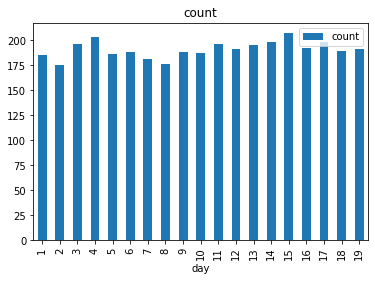

In [20]:
df_train.groupby(['day'])[['count']].mean().plot.bar(subplots=True);

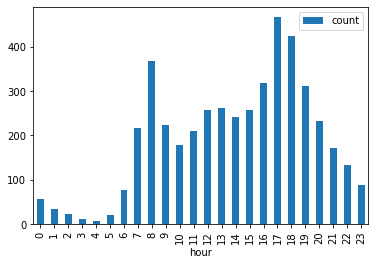

In [21]:
df_train.groupby(['hour'])[['count']].mean().plot.bar();

array([<AxesSubplot:title={'center':'count'}, xlabel='year,month'>],
│     dtype=object)

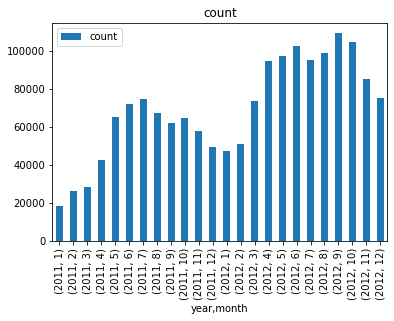

In [22]:
df_train.groupby(['year','month'])[['count']].sum().plot.bar(subplots=True)

##### Step 3.2.10 - Count

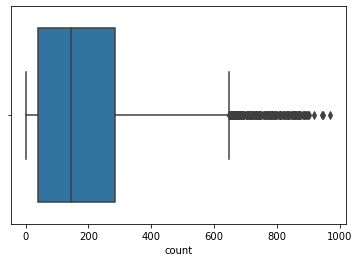

In [23]:
sns.boxplot(x = df_train['count'])

In [24]:
print(len(df_train[df_train['count'] > 600]['count'].values))
print(len(df_train[df_train['count'] < 600]['count'].values))

324
8383


<seaborn.axisgrid.FacetGrid object at 0x7f5ec011bbb0>

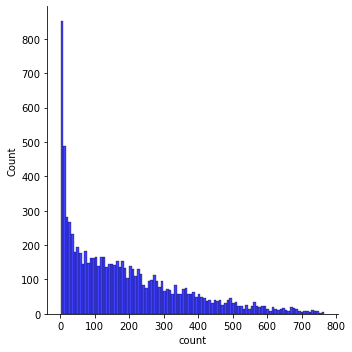

In [25]:
Q99 = np.percentile(df_train['count'].values, [99])

df_distplot = df_train[df_train['count'] < Q99[0]]

sns.displot(df_distplot['count'], bins = 100, color = 'blue')

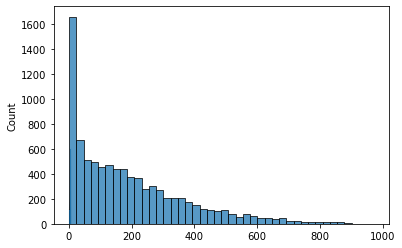

In [26]:
sns.histplot(df_train['count'].values)
sns.histplot(np.log(df_train['count'].values)) # log transformed target

### **Conclusion from the EDA**

<hr style="border:2px solid black">

    - Season:

    - Holiday:

	- Workingday:
	
	- Weather:
	
	- Temp:
	
	- Atemp:
	
	- Humidity:
	
	- Windspeed:
	
	- Datetime:
	
	- use a random forest as a baseline model and get the feature importance

<hr style="border:2px solid black">

### Step 4 - cleaning & scaling

   - *Fix or remove outliers (otional).*
   - *Fill in missing values (e.g. with zero, mean, median ...) or drop their rows (or columns).*
   - *Standardize or nomalize features*

#### Step 4.1 - impute missing values

In [27]:
# no missing values

#### Step 4.2 - scaling

In [28]:
# in further analysis I will mainly distinguish between numerical and categorical features
categorical_features = ['season', 'weather', 'month_name', 'day_name','year','day','hour']
numeric_features     = ['temp','atemp','humidity','windspeed']

In [29]:
# standard scaler and simple imputer for floats (in case the test or production data contain missing data that couldn't be spotted during the training)
numeric_steps =     [
                       ('imputer' , SimpleImputer(strategy = 'mean')) 
                     , ('scaler'  , StandardScaler()                )     
                    ]

numeric_transformer = Pipeline(numeric_steps)

#### Step 4.3 - interpolation

In [30]:
# no missing values

#### Step 4.4 - remove duplicates and outliers

In [31]:
# handle the weather condition no 4

### Step 5 - feature engineering

   - *Discretize continious features.*
   - *Decompose features (e.g. categorical, date/time, etc.).*
   - *Add promising transformations of features (e.g. log(x), sqrt(x), x^2, etc.).*
   - *Aggregate features into promising new features.*

#### Step 5.1 - feature extraction, decomposition and transformation

In [32]:
def indexicator(dataframe):
    dataframe = pd.DataFrame(dataframe).copy()
    
    dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
    dataframe.set_index('datetime', inplace=True)
    
    return dataframe

In [33]:
# Let's first create new columns out of the datetime
def datetime_extractor(dataframe):
    dataframe = pd.DataFrame(dataframe).copy()

    dataframe["year"]       = dataframe.index.year
    dataframe["month"]      = dataframe.index.month
    dataframe["month_name"] = dataframe.index.month_name()
    dataframe["day_name"]   = dataframe.index.day_name()
    dataframe["day"]        = dataframe.index.day
    dataframe["hour"]       = dataframe.index.hour
    
    return dataframe

In [34]:
# then we translate season and weather into readable values
def cat_translator(dataframe):
    dataframe = pd.DataFrame(dataframe).copy()
    
    dataframe.replace({'season'  : { 1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' }}, inplace =True)
    dataframe.replace({'weather' : { 1 : 'nice'  , 2 : 'ok'    , 3 : 'bad' , 4 : 'worst'  }}, inplace =True)
    
    return dataframe

#### Step 5.2 - encoding of categorical features

In [35]:
# standard scaler and simple imputer for floats (in case the test or production data contain missing data that couldn't be spotted during the training)
categorical_steps = [
                       ('imputer' , SimpleImputer(strategy       = 'most_frequent' ))
                     , ('onehot'  , OneHotEncoder(handle_unknown = 'ignore'        ))
                    ]

categorical_transformer = Pipeline(categorical_steps)

#### Step 5.3 - discretizing of continious features

In [36]:
# dicetize the age into bins of five years
discretizer_step        = [('discretizer', KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile', dtype=None, subsample='warn', random_state=None))]

discretizer_transformer = Pipeline(discretizer_step)

#### Step 5.4 - drop features

#### Step 5.5 - sampling strategy in case of imbalanced data

#### Step 5.6 - implement polynomials

### Step 6 - baseline model

#### Step 6.1 - create pipeline for the baseline model 

##### Step 6.1.1 - function and column transformer

In [37]:
# extractions and transformations
index_transformer    = FunctionTransformer(indexicator)
datetime_transformer = FunctionTransformer(datetime_extractor)
cat_transformer      = FunctionTransformer(cat_translator)

# column transformer
col_transformer = ColumnTransformer(transformers = [
                                                      ('numeric'     ,     numeric_transformer , numeric_features     )
                                                    , ('categorical' , categorical_transformer , categorical_features )
                                                    , ('discretizer' , discretizer_transformer , numeric_features     )
                                                   ] 
                                   )

##### Step 6.1.2 - set up pipeline with estimators

In [38]:
class DummyEstimator(BaseEstimator):
    def fit(self):   pass
    def score(self): pass

In [39]:
pipeline = Pipeline([
                    # my function transformers
                       ( 'indexicator'           , index_transformer           )
                     , ( 'datetime_extractor'    , datetime_transformer        )
                     , ( 'categoricator'         , cat_transformer             )
                    # my column transformers
                     , ( 'col_transformer'       , col_transformer             )
                    # my estimator ...
                     , ( 'regressor'             , DummyEstimator()            )                     
                    ])

In [40]:
pipeline.named_steps

{
│   'indexicator': FunctionTransformer(func=<function indexicator at 0x7f5ec36455e0>),
│   'datetime_extractor': FunctionTransformer(func=<function datetime_extractor at 0x7f5eb963e550>),
│   'categoricator': FunctionTransformer(func=<function cat_translator at 0x7f5eb963eaf0>),
│   'col_transformer': ColumnTransformer(transformers=[('numeric',
│   │   │   │   │   │   │   │    Pipeline(steps=[('imputer', SimpleImputer()),
│   │   │   │   │   │   │   │   │   │   │   │    ('scaler', StandardScaler())]),
│   │   │   │   │   │   │   │    ['temp', 'atemp', 'humidity', 'windspeed']),
│   │   │   │   │   │   │   │   ('categorical',
│   │   │   │   │   │   │   │    Pipeline(steps=[('imputer',
│   │   │   │   │   │   │   │   │   │   │   │     SimpleImputer(strategy='most_frequent')),
│   │   │   │   │   │   │   │   │   │   │   │    ('onehot',
│   │   │   │   │   │   │   │   │   │   │   │     OneHotEncoder(handle_unknown='ignore'))]),
│   │   │   │   │   │   │   │    ['season', 'weather', 'month_name', 'day_name',
│   │   │   │   │   │   │   │     'year', 'day', 'hour']),
│   │   │   │   │   │   │   │   ('discretizer',
│   │   │   │   │   │   │   │    Pipeline(steps=[('discretizer',
│   │   │   │   │   │   │   │   │   │   │   │     KBinsDiscretizer())]),
│   │   │   │   │   │   │   │    ['temp', 'atemp', 'humidity', 'windspeed'])]),
│   'regressor': DummyEstimator()
}

In [41]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'indexicator', 'datetime_extractor', 'categoricator', 'col_transformer', 'regressor', 'indexicator__accept_sparse', 'indexicator__check_inverse', 'indexicator__feature_names_out', 'indexicator__func', 'indexicator__inv_kw_args', 'indexicator__inverse_func', 'indexicator__kw_args', 'indexicator__validate', 'datetime_extractor__accept_sparse', 'datetime_extractor__check_inverse', 'datetime_extractor__feature_names_out', 'datetime_extractor__func', 'datetime_extractor__inv_kw_args', 'datetime_extractor__inverse_func', 'datetime_extractor__kw_args', 'datetime_extractor__validate', 'categoricator__accept_sparse', 'categoricator__check_inverse', 'categoricator__feature_names_out', 'categoricator__func', 'categoricator__inv_kw_args', 'categoricator__inverse_func', 'categoricator__kw_args', 'categoricator__validate', 'col_transformer__n_jobs', 'col_transformer__remainder', 'col_transformer__sparse_threshold', 'col_transformer__transformer_weights', 'col_transformer__transformers', 'col_transformer__verbose', 'col_transformer__verbose_feature_names_out', 'col_transformer__numeric', 'col_transformer__categorical', 'col_transformer__discretizer', 'col_transformer__numeric__memory', 'col_transformer__numeric__steps', 'col_transformer__numeric__verbose', 'col_transformer__numeric__imputer', 'col_transformer__numeric__scaler', 'col_transformer__numeric__imputer__add_indicator', 'col_transformer__numeric__imputer__copy', 'col_transformer__numeric__imputer__fill_value', 'col_transformer__numeric__imputer__missing_values', 'col_transformer__numeric__imputer__strategy', 'col_transformer__numeric__imputer__verbose', 'col_transformer__numeric__scaler__copy', 'col_transformer__numeric__scaler__with_mean', 'col_transformer__numeric__scaler__with_std', 'col_transformer__categorical__memory', 'col_transformer__categorical__steps', 'col_transformer__categorical__verbose', 'col_transformer__categorical__imputer', 'col_transformer__categorical__onehot', 'col_transformer__categorical__imputer__add_indicator', 'col_transformer__categorical__imputer__copy', 'col_transformer__categorical__imputer__fill_value', 'col_transformer__categorical__imputer__missing_values', 'col_transformer__categorical__imputer__strategy', 'col_transformer__categorical__imputer__verbose', 'col_transformer__categorical__onehot__categories', 'col_transformer__categorical__onehot__drop', 'col_transformer__categorical__onehot__dtype', 'col_transformer__categorical__onehot__handle_unknown', 'col_transformer__categorical__onehot__max_categories', 'col_transformer__categorical__onehot__min_frequency', 'col_transformer__categorical__onehot__sparse', 'col_transformer__discretizer__memory', 'col_transformer__discretizer__steps', 'col_transformer__discretizer__verbose', 'col_transformer__discretizer__discretizer', 'col_transformer__discretizer__discretizer__dtype', 'col_transformer__discretizer__discretizer__encode', 'col_transformer__discretizer__discretizer__n_bins', 'col_transformer__discretizer__discretizer__random_state', 'col_transformer__discretizer__discretizer__strategy', 'col_transformer__discretizer__discretizer__subsample'])

##### Step 6.1.3 - define the hyperparameter grid

In [42]:
hyperparam_grid = [
                  {
                      'regressor'                  : [RandomForestRegressor()]
                    , 'regressor__n_estimators'    : [5, 10, 100, 200]
                    , 'regressor__min_samples_leaf': [5, 10]
                  },
                  {
                      'regressor'                  : [GradientBoostingRegressor()]
                    , 'regressor__n_estimators'    : [50, 100, 200]
                    , 'regressor__learning_rate'   : [0.05, 0.1, 0.2]    
                  },
                  {
                      'regressor'                  : [xgb.XGBRegressor(objective ='reg:squarederror')]
                    , 'regressor__n_estimators'    : [50, 100, 200]
                    , 'regressor__learning_rate'   : [0.05, 0.1, 0.2]
                  }
]

# Lasso Regression, Ridge Regression, Gaussian Regression, Polynomial Regression 

##### Step 6.1.4 - set up the grid search CV

In [43]:
gs = GridSearchCV(
                      estimator  = pipeline 
                    , param_grid = hyperparam_grid                    
                    , cv         = 5                                         
                    , scoring    = 'neg_root_mean_squared_error'
                )

#### Step 6.2 - run the baseline model

In [44]:
grid_search = gs.fit(X_train, y_train)

#### Step 6.3 - evaluate the model

In [45]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__min_samples_leaf,param_regressor__n_estimators,param_regressor__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.985638,0.288430,0.031461,0.008171,"XGBRegressor(base_score=None, booster=None, ca...",NaN,200,0.2,"{'regressor': XGBRegressor(base_score=None, bo...",-50.669833,-52.833178,-47.028199,-52.046060,-50.527633,-50.620980,1.992177,1
22,1.219500,0.000860,0.038123,0.000660,"XGBRegressor(base_score=None, booster=None, ca...",NaN,200,0.1,"{'regressor': XGBRegressor(base_score=None, bo...",-53.226786,-54.520497,-50.176080,-54.917058,-52.824277,-53.132940,1.670658,2
24,0.640961,0.017569,0.035932,0.000233,"XGBRegressor(base_score=None, booster=None, ca...",NaN,100,0.2,"{'regressor': XGBRegressor(base_score=None, bo...",-53.070077,-55.632548,-50.758021,-54.638996,-52.885660,-53.397060,1.665700,3
23,0.369538,0.012263,0.035471,0.000409,"XGBRegressor(base_score=None, booster=None, ca...",NaN,50,0.2,"{'regressor': XGBRegressor(base_score=None, bo...",-60.556195,-61.860620,-57.346686,-62.173530,-59.581514,-60.303709,1.746396,4
21,0.659563,0.000757,0.035850,0.000246,"XGBRegressor(base_score=None, booster=None, ca...",NaN,100,0.1,"{'regressor': XGBRegressor(base_score=None, bo...",-60.626533,-61.691911,-57.356857,-62.348485,-63.744204,-61.153598,2.150433,5


In [46]:
best_pipe = gs.best_estimator_

In [47]:
best_pipe

Pipeline(steps=[('indexicator',
                 FunctionTransformer(func=<function indexicator at 0x7f5ec36455e0>)),
                ('datetime_extractor',
                 FunctionTransformer(func=<function datetime_extractor at 0x7f5eb963e550>)),
                ('categoricator',
                 FunctionTransformer(func=<function cat_translator at 0x7f5eb963eaf0>)),
                ('col_transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(step...
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.2, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=200, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [48]:
predictions_test = best_pipe.predict(X_test)

In [49]:
best_pipe.score(X_test, y_test)

0.9246170959955409

In [50]:
test_subm = pd.read_csv(PATH + 'test.csv')

In [51]:
test_subm.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [52]:
predictions_test = best_pipe.predict(test_subm)

In [53]:
# predictions_test
predictions_test = [np.round(x) for x in predictions_test]
predictions_test = [0 if x < 0 else x for x in predictions_test]

In [54]:
# datetime_ = test_subm[['datetime']]
test_subm['datetime'] = pd.to_datetime(test_subm['datetime'] )
test_subm.set_index('datetime', inplace = True)

In [55]:
datetime_ = test_subm.index
datetime_

DatetimeIndex(['2011-01-20 00:00:00', '2011-01-20 01:00:00',
│   │   │      '2011-01-20 02:00:00', '2011-01-20 03:00:00',
│   │   │      '2011-01-20 04:00:00', '2011-01-20 05:00:00',
│   │   │      '2011-01-20 06:00:00', '2011-01-20 07:00:00',
│   │   │      '2011-01-20 08:00:00', '2011-01-20 09:00:00',
│   │   │      ...
│   │   │      '2012-12-31 14:00:00', '2012-12-31 15:00:00',
│   │   │      '2012-12-31 16:00:00', '2012-12-31 17:00:00',
│   │   │      '2012-12-31 18:00:00', '2012-12-31 19:00:00',
│   │   │      '2012-12-31 20:00:00', '2012-12-31 21:00:00',
│   │   │      '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
│   │   │     dtype='datetime64[ns]', name='datetime', length=6493, freq=None)

In [56]:
result_bike = pd.DataFrame({'datetime' : datetime_,
                            'count'    : predictions_test
                           })

In [57]:
result_bike.to_csv('result_bike.csv', index=False)

#### Step 6.4 - evaluate the feature importance

#### Step 6.5 - feature selection

### Step 7 - model tuning

#### Step 7.1 - create a pipeline for model tuning

##### Step 7.1.1 - function transformer

##### Step 7.1.2 - column transformer

##### Step 7.1.3 - set up pipeline with estimators

##### Step 7.1.4 - define the hyperparameter grid

##### Step 7.1.5 - set up the grid search CV

#### Step 7.2 - run the tuner model

#### Step 7.3 - evaluate the tuner model

#### Step 7.4 - handle over-/underfitting (e.g. regularization) - if necessary

#### Step 7.5 - optimize the model

### Step 8 - retraining the best model with the whole data set

### Step 9 - pickle the best model

In [58]:
# are there any duplicated rows?
df_train.duplicated().sum()

data['count'] = np.log(data['count'])

#RMSLE
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))

NameError: name 'data' is not defined

More ...

Traceback (most recent call last):                                                                  
  Code block [58], line 4                                                                           
    data['count'] = np.log(data['count'])                                                           
NameError: name 'data' is not defined                                                               

Did you forget to add ___.?

what()

A NameError exception indicates that a variable or function name is   
not known to Python. Most often, this is because there is a spelling  
mistake. However, sometimes it is because the name is used before     
being defined or given a value.

why()

In your program, no object with the name data exists.                 

The local object ___ has an attribute named data. Perhaps you should  
have written ___.data instead of data.

where()

Exception raised on line 4 of code block [58].                                                      

       1| # are there any duplicated rows?
       2| df_train.duplicated().sum()
       3| 
     > 4| data['count'] = np.log(data['count'])
       5| 
       6| #RMSLE

    np:  <module numpy> from LOCAL:/numpy/__init__.py                                               
    np.log:  <ufunc 'log>                                                                           

In [ ]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)